In [1]:
#!pip3 install tensorflow

In [3]:
#!pip install keras

In [1]:
# https://www.upgrad.com/blog/stock-market-prediction-using-machine-learning/

#Importing the Libraries

import pandas as pd

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

import matplotlib

from sklearn.preprocessing import MinMaxScaler

from keras.layers import LSTM, Dense, Dropout

from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.dates as mandates

from sklearn.preprocessing import MinMaxScaler



ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (C:\Users\Hassan\anaconda3\lib\site-packages\tensorflow\_api\v2\compat\v2\experimental\__init__.py)

In [ ]:
from tensorflow import keras

from sklearn import linear_model

from keras.models import Sequential

from keras.layers import Dense

import keras.backend as K

from keras.callbacks import EarlyStopping

#from keras.Optimizers import Adam

from keras.models import load_model

from keras.layers import LSTM

from keras.utils.vis_utils import plot_model

In [2]:
#Get the Dataset

df = pd.read_csv("D:\\Stock Data\\TRG.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

df.head()

,Symbol,Name,Open,High,Low,Close,Avg.,Turnover,LDCP
Date,,,,,,,,,
2021-11-26,TRG,TRG Pakistan Limited,88.3,90.99,85.70,87.43,88.55,9531136,88.80
2021-11-25,TRG,TRG Pakistan Limited,90.8,91.94,86.80,88.80,89.59,7946662,90.11
2021-11-24,TRG,TRG Pakistan Limited,86.5,94.80,82.20,90.11,88.16,26519206,88.35
2021-11-23,TRG,TRG Pakistan Limited,94.0,95.39,88.35,88.35,91.57,19634226,95.51
2021-11-22,TRG,TRG Pakistan Limited,96.0,98.48,95.51,95.51,96.15,22372983,103.25


In [3]:
#Print Dataframe shape and Check for Null Values

print("Dataframe Shape: ", df.shape)

print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (271, 9)
Null Value Present:  False


In [4]:
df['MA_window_10'] = df['Close'].rolling(10).mean().shift()
df['MA_window_3'] = df['Close'].rolling(3).mean().shift()

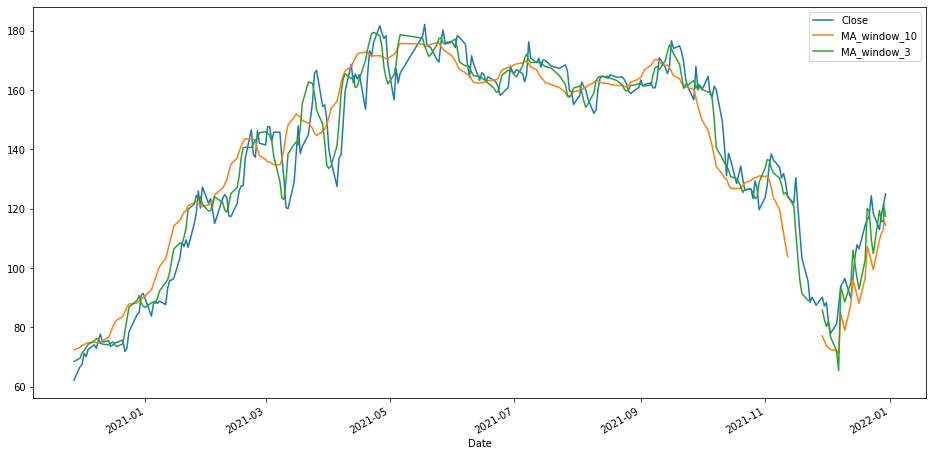

In [5]:
#Plot the True Adj Close Value
plt.figure(figsize=(16,8))
df['Close'].plot()
df['MA_window_10'].plot()
df['MA_window_3'].plot()
plt.legend()

In [6]:
df.tail(10)

,Symbol,Name,Open,High,Low,Close,Avg.,Turnover,LDCP,MA_window_10,MA_window_3
Date,,,,,,,,,,,
2021-12-20,TRG,TRG Pakistan Limited,108.00,114.41,106.92,114.41,111.20,25677786,106.43,96.662,102.663333
2021-12-24,TRG,TRG Pakistan Limited,124.07,127.21,117.12,118.40,122.24,20581159,124.35,99.390,104.860000
2021-12-23,TRG,TRG Pakistan Limited,118.30,125.89,117.51,124.35,121.46,19926763,117.53,102.217,109.760000
2021-12-22,TRG,TRG Pakistan Limited,117.00,118.50,115.18,117.53,117.17,8496788,116.24,105.008,119.053333
2021-12-21,TRG,TRG Pakistan Limited,117.90,121.49,115.65,116.24,118.33,20928534,114.41,107.256,120.093333
2021-12-27,TRG,TRG Pakistan Limited,118.01,118.40,112.34,112.97,115.11,9508272,118.40,109.509,119.373333
2021-12-28,TRG,TRG Pakistan Limited,113.50,119.20,113.02,118.21,117.24,12413718,112.97,111.832,115.580000
2021-12-29,TRG,TRG Pakistan Limited,119.00,122.00,117.01,121.13,119.76,11757704,118.21,113.010,115.806667
2021-12-30,TRG,TRG Pakistan Limited,129.98,129.98,123.50,125.01,126.39,"17,707,469",121.13,114.341,117.436667


In [7]:
#Set Target Variable

output_var = pd.DataFrame(df['Close'])

#Selecting the Features

features = ['LDCP' ,'Avg.']

In [8]:
#Scaling

scaler = MinMaxScaler()

feature_transform = scaler.fit_transform(df[features])

feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)

feature_transform.head()

,LDCP,Avg.
Date,,
2021-11-26,0.246530,0.228749
2021-11-25,0.257101,0.237153
2021-11-24,0.242899,0.225598
2021-11-23,0.300678,0.253151
2021-11-22,0.363138,0.290158


In [9]:
#Splitting to Training set and Test set

timesplit= TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(feature_transform):

        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]

        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

NameError: name 'TimeSeriesSplit' is not defined

In [11]:
#Process the data for LSTM

trainX =np.array(X_train)

testX =np.array(X_test)

 

X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [12]:
from tensorflow.keras import regularizers

#Building the LSTM Model

lstm = Sequential()

lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True))

lstm.add(LSTM(64, return_sequences=False))
lstm.add(Dropout(0.2))
lstm.add(Dense(25,activation='relu', activity_regularizer=regularizers.l2(1e-4)))

lstm.add(Dense(25,activation='relu', activity_regularizer=regularizers.l2(1e-4)))
#lstm.add(Dropout(0.2))
#lstm.add(LSTM(50,return_sequences=False))

lstm.add(Dense(1))

lstm.compile(loss='mean_squared_error', optimizer='adam')

# plot_model(lstm, show_shapes=True, show_layer_names=True)

In [13]:
# !pip install pydot

In [14]:
#Model Training

history = lstm.fit(X_train, y_train, epochs=1200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/1200
31/31 [==============================] - 3s 3ms/step - loss: 20634.9473
Epoch 2/1200
31/31 [==============================] - 0s 3ms/step - loss: 20436.8262
Epoch 3/1200
31/31 [==============================] - 0s 3ms/step - loss: 19304.9922
Epoch 4/1200
31/31 [==============================] - 0s 3ms/step - loss: 14008.7021
Epoch 5/1200
31/31 [==============================] - 0s 3ms/step - loss: 2834.2874
Epoch 6/1200
31/31 [==============================] - 0s 3ms/step - loss: 180.0858
Epoch 7/1200
31/31 [==============================] - 0s 3ms/step - loss: 118.0134
Epoch 8/1200
31/31 [==============================] - 0s 3ms/step - loss: 82.4054
Epoch 9/1200
31/31 [==============================] - 0s 3ms/step - loss: 92.4052
Epoch 10/1200
31/31 [==============================] - 0s 3ms/step - loss: 93.7724
Epoch 11/1200
31/31 [==============================] - 0s 3ms/step - loss: 91.5256
Epoch 12/1200
31/31 [==============================] - 0s 3ms/step - loss: 100.7

31/31 [==============================] - 0s 3ms/step - loss: 90.5818
Epoch 197/1200
31/31 [==============================] - 0s 3ms/step - loss: 65.3282
Epoch 198/1200
31/31 [==============================] - 0s 3ms/step - loss: 98.1221
Epoch 199/1200
31/31 [==============================] - 0s 3ms/step - loss: 64.8587
Epoch 200/1200
31/31 [==============================] - 0s 3ms/step - loss: 80.3741
Epoch 201/1200
31/31 [==============================] - 0s 3ms/step - loss: 74.2488
Epoch 202/1200
31/31 [==============================] - 0s 3ms/step - loss: 84.8116
Epoch 203/1200
31/31 [==============================] - 0s 3ms/step - loss: 94.3054
Epoch 204/1200
31/31 [==============================] - 0s 3ms/step - loss: 81.4932
Epoch 205/1200
31/31 [==============================] - 0s 3ms/step - loss: 88.7698
Epoch 206/1200
31/31 [==============================] - 0s 3ms/step - loss: 86.7877
Epoch 207/1200
31/31 [==============================] - 0s 3ms/step - loss: 88.9328
Epoch 2

31/31 [==============================] - 0s 3ms/step - loss: 51.8179
Epoch 391/1200
31/31 [==============================] - 0s 4ms/step - loss: 44.8466
Epoch 392/1200
31/31 [==============================] - 0s 4ms/step - loss: 54.5598
Epoch 393/1200
31/31 [==============================] - 0s 4ms/step - loss: 51.7494
Epoch 394/1200
31/31 [==============================] - 0s 4ms/step - loss: 66.0104
Epoch 395/1200
31/31 [==============================] - 0s 4ms/step - loss: 65.1012
Epoch 396/1200
31/31 [==============================] - 0s 3ms/step - loss: 80.7565
Epoch 397/1200
31/31 [==============================] - 0s 3ms/step - loss: 71.2455
Epoch 398/1200
31/31 [==============================] - 0s 3ms/step - loss: 72.6432
Epoch 399/1200
31/31 [==============================] - 0s 4ms/step - loss: 72.2200
Epoch 400/1200
31/31 [==============================] - 0s 4ms/step - loss: 82.0853
Epoch 401/1200
31/31 [==============================] - 0s 3ms/step - loss: 76.6372
Epoch 4

31/31 [==============================] - 0s 4ms/step - loss: 37.6398
Epoch 585/1200
31/31 [==============================] - 0s 4ms/step - loss: 45.8765
Epoch 586/1200
31/31 [==============================] - 0s 4ms/step - loss: 39.4202
Epoch 587/1200
31/31 [==============================] - 0s 4ms/step - loss: 39.6618
Epoch 588/1200
31/31 [==============================] - 0s 4ms/step - loss: 33.7304
Epoch 589/1200
31/31 [==============================] - 0s 4ms/step - loss: 33.7508
Epoch 590/1200
31/31 [==============================] - 0s 4ms/step - loss: 31.6404
Epoch 591/1200
31/31 [==============================] - 0s 4ms/step - loss: 28.4919
Epoch 592/1200
31/31 [==============================] - 0s 4ms/step - loss: 32.5344
Epoch 593/1200
31/31 [==============================] - 0s 3ms/step - loss: 25.1975
Epoch 594/1200
31/31 [==============================] - 0s 4ms/step - loss: 19.1868
Epoch 595/1200
31/31 [==============================] - 0s 4ms/step - loss: 16.6611
Epoch 5

31/31 [==============================] - 0s 3ms/step - loss: 23.7768
Epoch 779/1200
31/31 [==============================] - 0s 3ms/step - loss: 18.6514
Epoch 780/1200
31/31 [==============================] - 0s 3ms/step - loss: 16.3113
Epoch 781/1200
31/31 [==============================] - 0s 4ms/step - loss: 12.8302
Epoch 782/1200
31/31 [==============================] - 0s 4ms/step - loss: 10.7312
Epoch 783/1200
31/31 [==============================] - 0s 5ms/step - loss: 11.0039
Epoch 784/1200
31/31 [==============================] - 0s 4ms/step - loss: 10.5663
Epoch 785/1200
31/31 [==============================] - 0s 4ms/step - loss: 10.2448
Epoch 786/1200
31/31 [==============================] - 0s 3ms/step - loss: 12.3027
Epoch 787/1200
31/31 [==============================] - 0s 4ms/step - loss: 8.9373
Epoch 788/1200
31/31 [==============================] - 0s 4ms/step - loss: 11.0938
Epoch 789/1200
31/31 [==============================] - 0s 4ms/step - loss: 10.3390
Epoch 79

31/31 [==============================] - 0s 4ms/step - loss: 8.3635
Epoch 877/1200
31/31 [==============================] - 0s 5ms/step - loss: 9.1641A: 0s - loss: 8.754
Epoch 878/1200
31/31 [==============================] - 0s 4ms/step - loss: 11.1957
Epoch 879/1200
31/31 [==============================] - 0s 4ms/step - loss: 10.5215
Epoch 880/1200
31/31 [==============================] - 0s 4ms/step - loss: 14.8686
Epoch 881/1200
31/31 [==============================] - 0s 4ms/step - loss: 14.4899
Epoch 882/1200
31/31 [==============================] - 0s 4ms/step - loss: 27.5835
Epoch 883/1200
31/31 [==============================] - 0s 4ms/step - loss: 21.7948
Epoch 884/1200
31/31 [==============================] - 0s 4ms/step - loss: 39.3955
Epoch 885/1200
31/31 [==============================] - 0s 4ms/step - loss: 42.3633
Epoch 886/1200
31/31 [==============================] - 0s 4ms/step - loss: 59.8802
Epoch 887/1200
31/31 [==============================] - 0s 4ms/step - loss

31/31 [==============================] - 0s 3ms/step - loss: 32.4868
Epoch 1070/1200
31/31 [==============================] - 0s 3ms/step - loss: 36.1914
Epoch 1071/1200
31/31 [==============================] - 0s 3ms/step - loss: 43.3672
Epoch 1072/1200
31/31 [==============================] - 0s 3ms/step - loss: 79.7291
Epoch 1073/1200
31/31 [==============================] - 0s 3ms/step - loss: 70.5693
Epoch 1074/1200
31/31 [==============================] - 0s 3ms/step - loss: 69.4814
Epoch 1075/1200
31/31 [==============================] - 0s 3ms/step - loss: 24.2245
Epoch 1076/1200
31/31 [==============================] - 0s 3ms/step - loss: 19.3290
Epoch 1077/1200
31/31 [==============================] - 0s 3ms/step - loss: 8.9556
Epoch 1078/1200
31/31 [==============================] - 0s 3ms/step - loss: 12.2553
Epoch 1079/1200
31/31 [==============================] - 0s 3ms/step - loss: 7.3889
Epoch 1080/1200
31/31 [==============================] - 0s 3ms/step - loss: 8.3145

31/31 [==============================] - 0s 4ms/step - loss: 28.5488
Epoch 1167/1200
31/31 [==============================] - 0s 4ms/step - loss: 15.2775
Epoch 1168/1200
31/31 [==============================] - 0s 4ms/step - loss: 12.8085
Epoch 1169/1200
31/31 [==============================] - 0s 4ms/step - loss: 14.4603
Epoch 1170/1200
31/31 [==============================] - 0s 4ms/step - loss: 8.6822
Epoch 1171/1200
31/31 [==============================] - 0s 3ms/step - loss: 7.8643
Epoch 1172/1200
31/31 [==============================] - 0s 4ms/step - loss: 7.3262
Epoch 1173/1200
31/31 [==============================] - 0s 4ms/step - loss: 9.0352
Epoch 1174/1200
31/31 [==============================] - 0s 4ms/step - loss: 6.9627
Epoch 1175/1200
31/31 [==============================] - 0s 3ms/step - loss: 8.5064
Epoch 1176/1200
31/31 [==============================] - 0s 3ms/step - loss: 7.9952
Epoch 1177/1200
31/31 [==============================] - 0s 4ms/step - loss: 7.6925
Epoc

In [15]:
#LSTM Prediction

y_pred= lstm.predict(X_test)

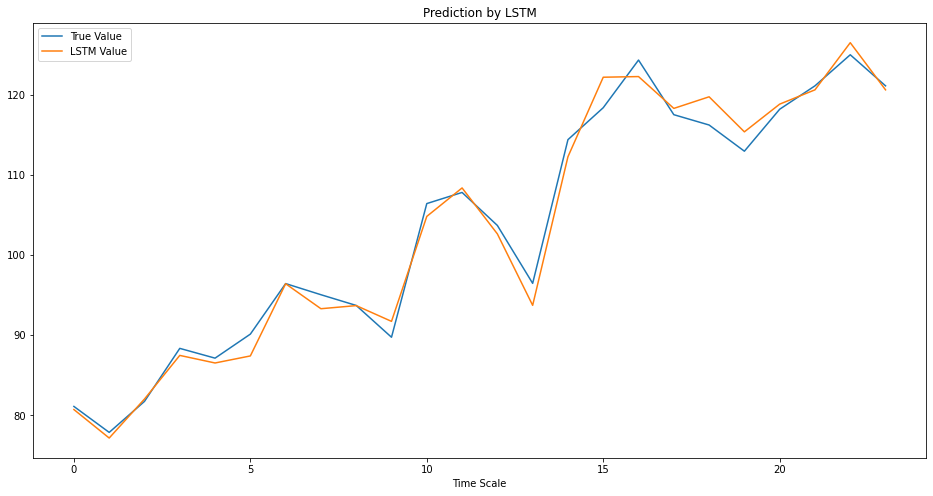

In [16]:
#True vs Predicted Adj Close Value – LSTM

plt.figure(figsize=(16,8))
plt.plot(y_test, label='True Value')

plt.plot(y_pred, label='LSTM Value')

plt.title("Prediction by LSTM")

plt.xlabel("Time Scale")


plt.legend()

In [31]:
print(type(X_test))
print(X_test.shape)
print(X_test.ndim)
print(X_test[0])

<class 'numpy.ndarray'>
(24, 1, 2)
3
[[0.15824726 0.1666936 ]]


In [32]:
#arr1=np.array([96.4,97.4,89.21,89.74,96.4]) #13th December
arr1 = (96.4,97.4,89.21,89.74,96.4)
print(arr1)
y_pred= lstm.predict(X_test[0])

(96.4, 97.4, 89.21, 89.74, 96.4)


ValueError: in user code:

    File "C:\Users\Hassan\anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Hassan\anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Hassan\anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Hassan\anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Hassan\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Hassan\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 213, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, None), dtype=float32)
      • training=False
      • mask=None
